<b>Vinicius F. Caridá</b>

<h1 style="text-align:center"> Machine Learning Hands-On </h1>

<h3 class="title"> Links úteis: </h3>
<br>
<ol>
  <li class="item"><a href = "http://scikit-learn.org/stable/"> Sklearn</a>: principal biblioteca de aprendizado de máquina para python.</li>
  <li class="item"><a href = "http://pandas.pydata.org/pandas-docs/stable/"> Pandas</a>: (quase) tudo o que você precisa para trabalhar rapidamente com tabelas</li>
  <li class="item"><a href = "https://docs.scipy.org/doc/numpy/reference/index.html"> Numpy</a>: funções matemáticas estão aqui</li>
  <li class="item"><a href = "https://matplotlib.org/contents.html"> Matplotlib</a>: te ajuda a plotar!</li>
  <li class="item"><a href = "https://seaborn.pydata.org/api.html"> Seaborn</a>: Deixa a matplotlib bonita (contém plots mais bem estruturados)</li>
</ol>

<b>Trabalharemos com as seguintes bases de dados:</b>
- iris.csv
- lenses_final.csv
- car.data
- horse-colic.data
- PETR4.SA.csv
- Boston.csv
- artificial_data

<b>Testem a leitura de um dos arquivos deste curso</b>
- Acessem a documentação da função <i>read_csv</i> do <i>pandas</i>: https://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html

In [18]:
import numpy as np 
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid', {"axes.grid" : False})
sns.set_context('notebook')
np.random.seed(42)

In [19]:
iris            = pd.read_csv("./data/iris.csv")
lenses          = pd.read_csv("./data/lenses_final.csv")
car             = pd.read_csv("./data/cars.csv")
horsecolic      = pd.read_table("./data/horse-colic.data")

C:\Users\vinicius\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: read_table is deprecated, use read_csv instead, passing sep='\t'.
  after removing the cwd from sys.path.


<h1 style="text-align:center"> Agrupamento </h1>

<h2 style="text-align:center; margin:40px"> Qual o melhor agrupamento para os personagens abaixo?</h2>

![](img/simpsons1.png)

<h2 style="text-align:center; margin:40px"> Existem diversos agrupamentos que fazem sentido... </h2>
<h3 style="text-align:center; margin:40px"> Grupo / Cluster é um conceito subjetivo </h3>

![](img/simpsons2.png)

<p style="margin-bottom:3cm;"></p>

![](img/simpsons4.png)
<p style="margin-bottom:1cm;"></p>
<b> Objetivo: </b> Encontrar grupos tais que <b>elementos similares são posicionados no mesmo grupo e elementos dissimilares são posicionados em grupos diferentes</b>.
<p style="margin-bottom:1cm;"></p>
<ul>
<li><b> Algoritmos Particionais: </b> Constroem uma partição dos dados ![](img/particionais.png)</li>
<p style="margin-bottom:1cm;"></p>
<li><b> Algoritmos Hierárquicos: </b> Constroem uma hierarquia de partições ![](img/hierarquicos.png)</li>
</ul>

<h2 style="margin-bottom:3cm;text-align:center"> Algoritmos Hierárquicos</h2>

<p style="margin-bottom:2cm;"> Em métodos de clustering hierárquicos, no início do algoritmo, cada objeto forma um singleton (cluster com um único objeto), e a cada iteração dois clusters são unidos. Desta forma, é possível recuperar qualquer partição intermediária com o valor de K desejado. </p>

![](img/fluxo_hierarquicos.png)

<p style="margin-bottom:2cm;"> A ordem na qual os clusters são agregados gera uma estrutura de árvore conhecida como <b>dendrograma</b> </p>

![](img/dendrograma.png)

<p style="margin-bottom:2cm;"> No dendrograma acima, os singletons formados pelos objetos <b>8</b> e <b>13</b> foram os primeiros a serem agregados. Cada corte horizontal em um dendrograma gera uma partição diferente, com uma quantidade de clusters (K) também diferente, variando entre 1 e o número de objetos. </p>

<h3> <font color = 'red'>Atenção:</font> Os algoritmos de clustering hierárquico são extremamente custosos! É necessário um uso de memória proporcional a $O(n^2)$ e uma quantidade de operações que pode variar de $O(n^2)$ a $O(n^3)$!

<h3> Scipy </h3>
Agora, vamos rodar os códigos abaixo que usam implementações disponíveis no pacote <i>scipy</i>.

In [20]:
from scipy.cluster import hierarchy

In [21]:
baseDados = pd.read_csv('data/base_agrupamento_2.csv')
X = baseDados[['X','Y']]

Utilizando o algoritmo <i>single-link</i> na base de dados com clusters concêntricos, o dendrograma mostra claramente 2 clusters.

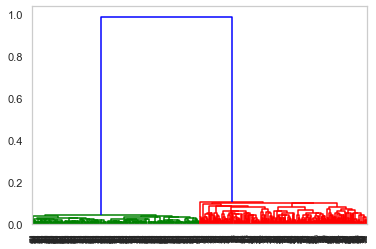

In [22]:
Z = hierarchy.linkage(X, method = 'single')
dendro = hierarchy.dendrogram(Z)
plt.show()

<b> O método de ligação pode afetar drasticamente os resultados do algoritmo </b>

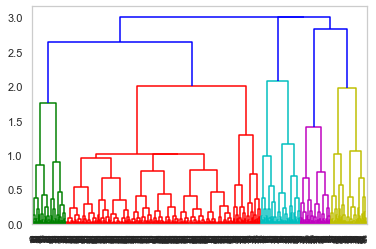

In [23]:
Z = hierarchy.linkage(X, method = 'complete')
dendro = hierarchy.dendrogram(Z)
plt.show()

Podemos recuperar uma partição com a função <i>fcluster</i>, passando como parâmetro o número de clusters desejado (K)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


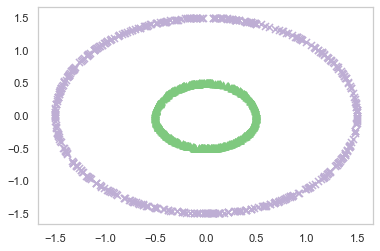

In [24]:
Z = hierarchy.linkage(X, method = 'single')
baseDados['hierarquico'] = hierarchy.fcluster(Z, 2, criterion = 'maxclust') - 1

markers = {0 : '^', 1 : 'x'}
for clu in baseDados.hierarquico.unique():
    plt.scatter(baseDados.X[baseDados.hierarquico == clu],
                baseDados.Y[baseDados.hierarquico == clu],
                s = 50,
                marker = markers[clu],
                c = plt.cm.Accent.colors[clu])

<h2 style="margin-bottom:3cm;text-align:center"> Algoritmos Particionais: K-Means</h2>

![](img/objetivo_agrupamento.png)
<h4 style="text-align:center;">Seja $K$ o número escolhido de clusters e $C_k$ o $k$-ésimo cluster, então queremos:</h4>
<h2 style="text-align:center;">$$\min{\sum_{k=1}^{K}\sum_{x \in C_k}||x - \bar{x}_k||^2}$$</h2>
<h4 style="text-align:center;">Onde $\bar{x}_k$ é o centroide do grupo $k$</h4>
<h2 style="text-align:center;">$$\bar{x}_k = \frac{1}{|C_k|}\sum_{x \in C_k} x$$</h2>
<h4 style="text-align:center;">A equação acima é geralmente chamada de <i>within cluster sum of squares</i></h4>

<p style="margin-bottom:1cm;"></p>
<h2 style="text-align:center;">Como minimizar?</h2>
<p style="margin-bottom:1cm;"></p>
<b>K-Means:</b> algoritmo de agrupamento <b>particional</b> cujo objetivo é particionar $n$ objetos em $k$ grupos onde cada objeto pertence ao grupo cujo centroide está mais próximo.

<b> Pseudo-código: </b>
```python
-- Particiona os objetos de entrada em K grupos
função K-Means(objetos, K):
    Inicialize K centroides {k1, k2, ..., kn} aleatoriamente
    Enquanto não houver convergência:
        Atribua cada objeto para o cluster cujo centroide está mais próximo
        Recalcule cada centroide como a média dos objetos do seu grupo
```
<h4 style="text-align:center;">Exemplo de iteração do K-Means</h4>
![](img/kmeans1.png)

<h3> Problema: </h3> Minimizar o <i>within cluster sum of squares</i> é um <b>problema NP-Completo</b>.
<ul>
    <li>Não existe algoritmo exato eficiente para resolver o problema! K-Means é apenas uma aproximação.</li>
    <li>O resultado pode variar significativamente dependendo da escolha dos centroides iniciais.</li>
    <li>O K-Means pode ficar "preso" em ótimos locais.</li>
</ul>

![](img/kmeans_bad.png)

<h3> Algumas possibilidades para contornar tais problemas: </h3>
<ul>
    <li><b>Multiplas execuções (inicializações aleatórias):</b> Funciona bem em muitos problemas porém pode demandar muitas execuções (especialmente com K alto).</li>
    <li><b>Agrupamento hierárquico:</b> Agrupa-se uma amostra dos dados para tomar os centros da partição com K grupos.</li>
    <li><b>K-Means++:</b> Selecionar o 1º centroide como um objeto aleatório, e sucessivamente, escolhe-se o próximo centroide aleatoriamente com probabilidade proporcional à distância entre este centroide e o centroide mais próximo que já foi selecionado.</li>
</ul>

![](img/kmeans_bad_2.png)

<h3> Cenário ideal para o funcionamento do K-Means: </h3>
<ul>
    <li>Clusters são (hiper)esféricos e bem separados</li>
    <li>Clusters têm variância aproximadamente igual</li>
    <li>Clusters têm quantidade de pontos semelhantes</li>
    <li>Dimensões (colunas) possuem a mesma variância</li>
</ul>

<h2 style="text-align:center; margin:40px"> Prática </h2>

Agora iremos executar o K-Means na prática. Primeiro, vamos dar uma olhada nas bases de dados:

In [25]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid', {"axes.grid" : False})
sns.set_context('notebook')
np.random.seed(42)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


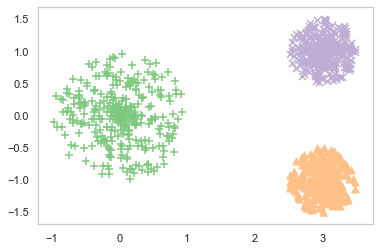

In [26]:
baseDados = pd.read_csv('data/base_agrupamento_1.csv')

markers = {1 : '+', 2 : 'x', 3 : '^'}
for clu in baseDados.clu.unique():
    plt.scatter(baseDados.X[baseDados.clu == clu],
                baseDados.Y[baseDados.clu == clu],
                s = 50,
                marker = markers[clu],
                c = plt.cm.Accent.colors[clu - 1])

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


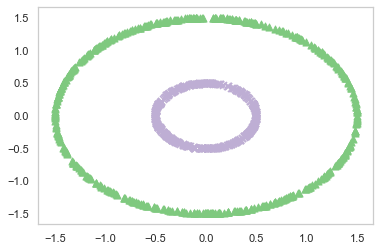

In [27]:
baseDados = pd.read_csv('data/base_agrupamento_2.csv')

markers = {1 : '^', 2 : 'x'}
for clu in baseDados.clu.unique():
    plt.scatter(baseDados.X[baseDados.clu == clu],
                baseDados.Y[baseDados.clu == clu],
                s = 50,
                marker = markers[clu],
                c = plt.cm.Accent.colors[clu - 1])

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


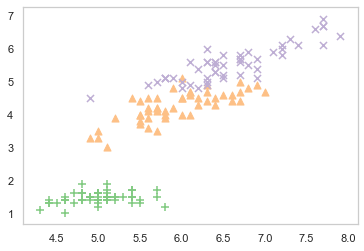

In [28]:
baseDados = pd.read_csv('data/iris.csv')

markers = {'setosa' : '+', 'virginica' : 'x', 'versicolor' : '^'}
colors = {'setosa' : 0, 'virginica' : 1, 'versicolor' : 2}
for clu in baseDados.species.unique():
    plt.scatter(baseDados['sepal length (cm)'][baseDados.species == clu],
                baseDados['petal length (cm)'][baseDados.species == clu],
                s = 50,
                marker = markers[clu],
                c = plt.cm.Accent.colors[colors[clu]])

<h3> Scikit-Learn </h3>
Agora, vamos rodar os códigos abaixo que usam uma implementação do algoritmo disponível no pacote <i>sklearn</i> (Scikit-Learn). Iremos rodar o código passo a passo para podermos visualizar os centroides em cada iteração.

In [29]:
from sklearn.cluster import KMeans

Primeiro lemos a base, inicializamos centroides aleatórios e preparamos as variáveis <i>xx</i> e <i>yy</i> que serão usadas para colorir a área que pertence à cada cluster na visualização

In [30]:
np.random.seed(42)
baseDados = pd.read_csv('data/base_agrupamento_1.csv')
X = baseDados[['X','Y']]
centers = np.array([[np.random.uniform(baseDados.X.min(), baseDados.X.max()),
            np.random.uniform(baseDados.Y.min(), baseDados.Y.max())] for i in range(3)])

h = .005
x_min, x_max = baseDados.X.min() - 1, baseDados.X.max() + 1
y_min, y_max = baseDados.Y.min() - 1, baseDados.Y.max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

Agora treinamos o algoritmo K-Means e exibimos a posição dos centroides a cada iteração

Se executarmos o algoritmo várias vezes, iremos perceber que os <b>resultados variam</b>, e eventualmente o algoritmo cai em um <b>ótimo local</b>!

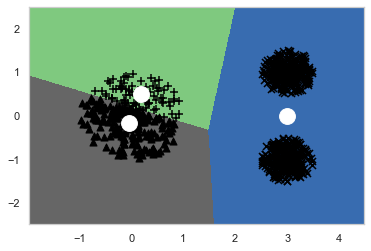

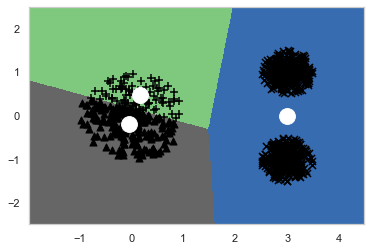

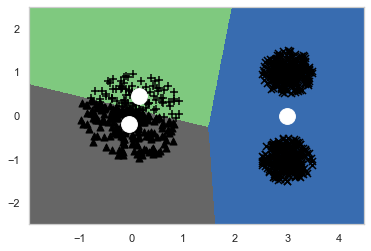

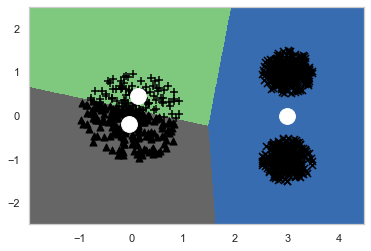

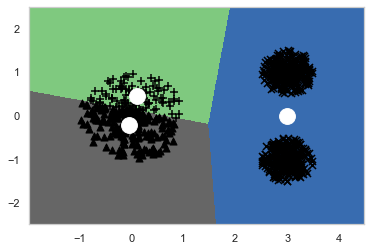

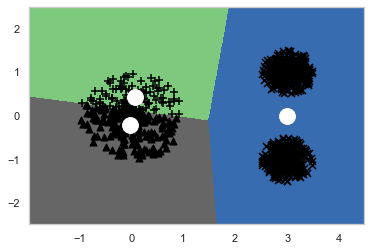

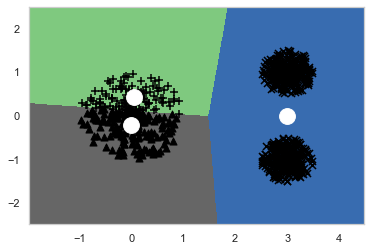

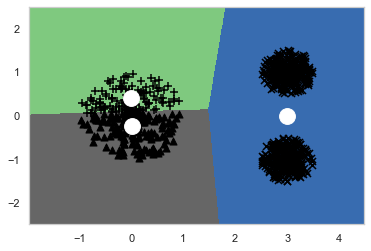

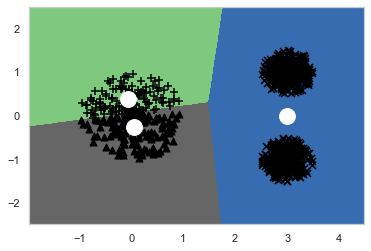

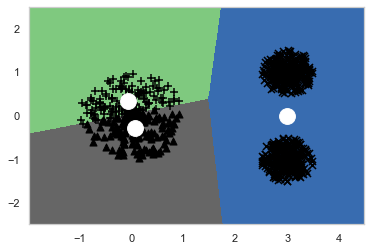

In [31]:
for _ in range(10):
    km = KMeans(n_clusters = 3, n_init = 1, init = centers, max_iter=1)
    baseDados['kmeans'] = km.fit_predict(X)
    
    # Nesta parte imprimimos a area colorida no fundo
    Z = km.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.figure(1)
    plt.clf()
    plt.imshow(Z, interpolation='nearest',
               extent=(xx.min(), xx.max(), yy.min(), yy.max()),
               cmap=plt.cm.Accent,
               aspect='auto', origin='lower')

    # Nesta parte imprimimos os pontos
    markers = {0 : '+', 1 : 'x', 2 : '^'}
    for clu in baseDados.kmeans.unique():
        plt.scatter(baseDados.X[baseDados.kmeans == clu],
                    baseDados.Y[baseDados.kmeans == clu],
                    s = 50,
                    marker = markers[clu],
                    c = 'black')

    for centroide in km.cluster_centers_:
        plt.scatter(centroide[0], centroide[1], s = 250, c = 'white')
    centers = km.cluster_centers_
    plt.show()

Executando com o <b>k-means++</b> e mais de uma inicialização, garantimos o melhor agrupamento para este conjunto de dados

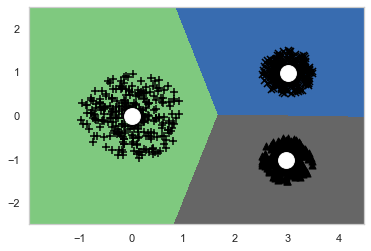

In [32]:
km = KMeans(n_clusters = 3, n_init = 3, init = 'k-means++', max_iter=300)
baseDados['kmeans'] = km.fit_predict(X)

# Nesta parte imprimimos a area colorida no fundo
Z = km.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.figure(1)
plt.clf()
plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Accent,
           aspect='auto', origin='lower')

# Nesta parte imprimimos os pontos
markers = {0 : '+', 1 : 'x', 2 : '^'}
for clu in baseDados.kmeans.unique():
    plt.scatter(baseDados.X[baseDados.kmeans == clu],
                baseDados.Y[baseDados.kmeans == clu],
                s = 50,
                marker = markers[clu],
                c = 'black')

for centroide in km.cluster_centers_:
    plt.scatter(centroide[0], centroide[1], s = 250, c = 'white')
centers = km.cluster_centers_
plt.show()

Na segunda base de dados, o KMeans não conseguirá agrupar os dados da forma que desejamos, não importa como ele for ajustado

In [33]:
baseDados = pd.read_csv('data/base_agrupamento_2.csv')
X = baseDados[['X','Y']]

h = .005
x_min, x_max = baseDados.X.min() - 1, baseDados.X.max() + 1
y_min, y_max = baseDados.Y.min() - 1, baseDados.Y.max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

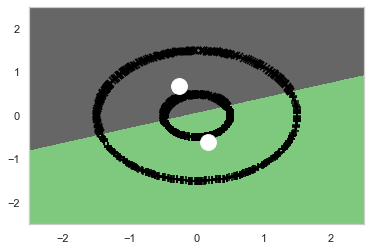

In [34]:
km = KMeans(n_clusters = 2, n_init = 3, init = 'k-means++', max_iter=300)
baseDados['kmeans'] = km.fit_predict(X)

# Nesta parte imprimimos a area colorida no fundo
Z = km.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.figure(1)
plt.clf()
plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Accent,
           aspect='auto', origin='lower')

# Nesta parte imprimimos os pontos
markers = {0 : '+', 1 : 'x', 2 : '^'}
for clu in baseDados.kmeans.unique():
    plt.scatter(baseDados.X[baseDados.kmeans == clu],
                baseDados.Y[baseDados.kmeans == clu],
                s = 50,
                marker = markers[clu],
                c = 'black')

for centroide in km.cluster_centers_:
    plt.scatter(centroide[0], centroide[1], s = 250, c = 'white')
centers = km.cluster_centers_
plt.show()

Vamos entender melhor como utilizar o algoritmo na prática

Primeiro precisamos criar o objeto <b>KMeans</b> com os seguintes parâmetros:
<ul>
    <li><b>n_clusters:</b> Número de clusters desejados (K)</li>
    <li><b>n_init:</b> Número de inicializações aleatórias. O padrão é 10.</li>
    <li><b>init:</b> Método de inicialização. O padrão é 'k-means++'. Também podemos optar por 'random' ou passar uma lista de centroides.</li>
    <li><b>max_iter:</b> Número máximo de iterações. O padrão é 300. Geralmente o algoritmo converge bem antes disso.</li>
</ul>

In [35]:
km = KMeans(n_clusters = 3, n_init = 10, init = 'k-means++', max_iter = 300)

Então devemos <b>treinar o algoritmo</b>, ou seja, calibrar os centroides, utilizando a função <b>fit</b>

In [36]:
km.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

Finalmente podemos <b>atribuir um cluster</b> para cada ponto com a função <b>predict</b>

In [37]:
baseDados['kmeans'] = km.predict(X)
baseDados.head()

,X,Y,clu,kmeans
0,-1.00,1.12,1,2
1,-0.22,-1.48,1,1
2,-0.98,-1.14,1,0
3,0.48,1.42,1,2
4,-0.51,-1.41,1,1


Caso precisemos dos <b>centroides</b>, podemos resgatá-los com o atributo <b>cluster\_centers\_</b>

In [38]:
km.cluster_centers_

array([[-0.78405882, -0.13238235],
       [ 0.50524496, -0.66074928],
       [ 0.19239617,  0.85405751]])

In [39]:
# Centroide do cluster k
k = 0
km.cluster_centers_[k, :]

array([-0.78405882, -0.13238235])

In [40]:
%matplotlib inline


# Demo of DBSCAN clustering algorithm


Finds core samples of high density and expands clusters from them.




Automatically created module for IPython interactive environment
Estimated number of clusters: 3
Estimated number of noise points: 18
Homogeneity: 0.953
Completeness: 0.883
V-measure: 0.917
Adjusted Rand Index: 0.952
Adjusted Mutual Information: 0.883
Silhouette Coefficient: 0.626


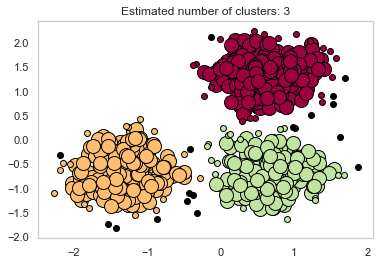

In [41]:
print(__doc__)

import numpy as np

from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets.samples_generator import make_blobs
from sklearn.preprocessing import StandardScaler


# #############################################################################
# Generate sample data
centers = [[1, 1], [-1, -1], [1, -1]]
X, labels_true = make_blobs(n_samples=750, centers=centers, cluster_std=0.4,
                            random_state=0)

X = StandardScaler().fit_transform(X)

# #############################################################################
# Compute DBSCAN
db = DBSCAN(eps=0.3, min_samples=10).fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)
print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels_true, labels))
print("Completeness: %0.3f" % metrics.completeness_score(labels_true, labels))
print("V-measure: %0.3f" % metrics.v_measure_score(labels_true, labels))
print("Adjusted Rand Index: %0.3f"
      % metrics.adjusted_rand_score(labels_true, labels))
print("Adjusted Mutual Information: %0.3f"
      % metrics.adjusted_mutual_info_score(labels_true, labels))
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X, labels))

# #############################################################################
# Plot result
import matplotlib.pyplot as plt

# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()


# Comparing different clustering algorithms on toy datasets


This example shows characteristics of different
clustering algorithms on datasets that are "interesting"
but still in 2D. With the exception of the last dataset,
the parameters of each of these dataset-algorithm pairs
has been tuned to produce good clustering results. Some
algorithms are more sensitive to parameter values than
others.

The last dataset is an example of a 'null' situation for
clustering: the data is homogeneous, and there is no good
clustering. For this example, the null dataset uses the
same parameters as the dataset in the row above it, which
represents a mismatch in the parameter values and the
data structure.

While these examples give some intuition about the
algorithms, this intuition might not apply to very high
dimensional data.



Automatically created module for IPython interactive environment


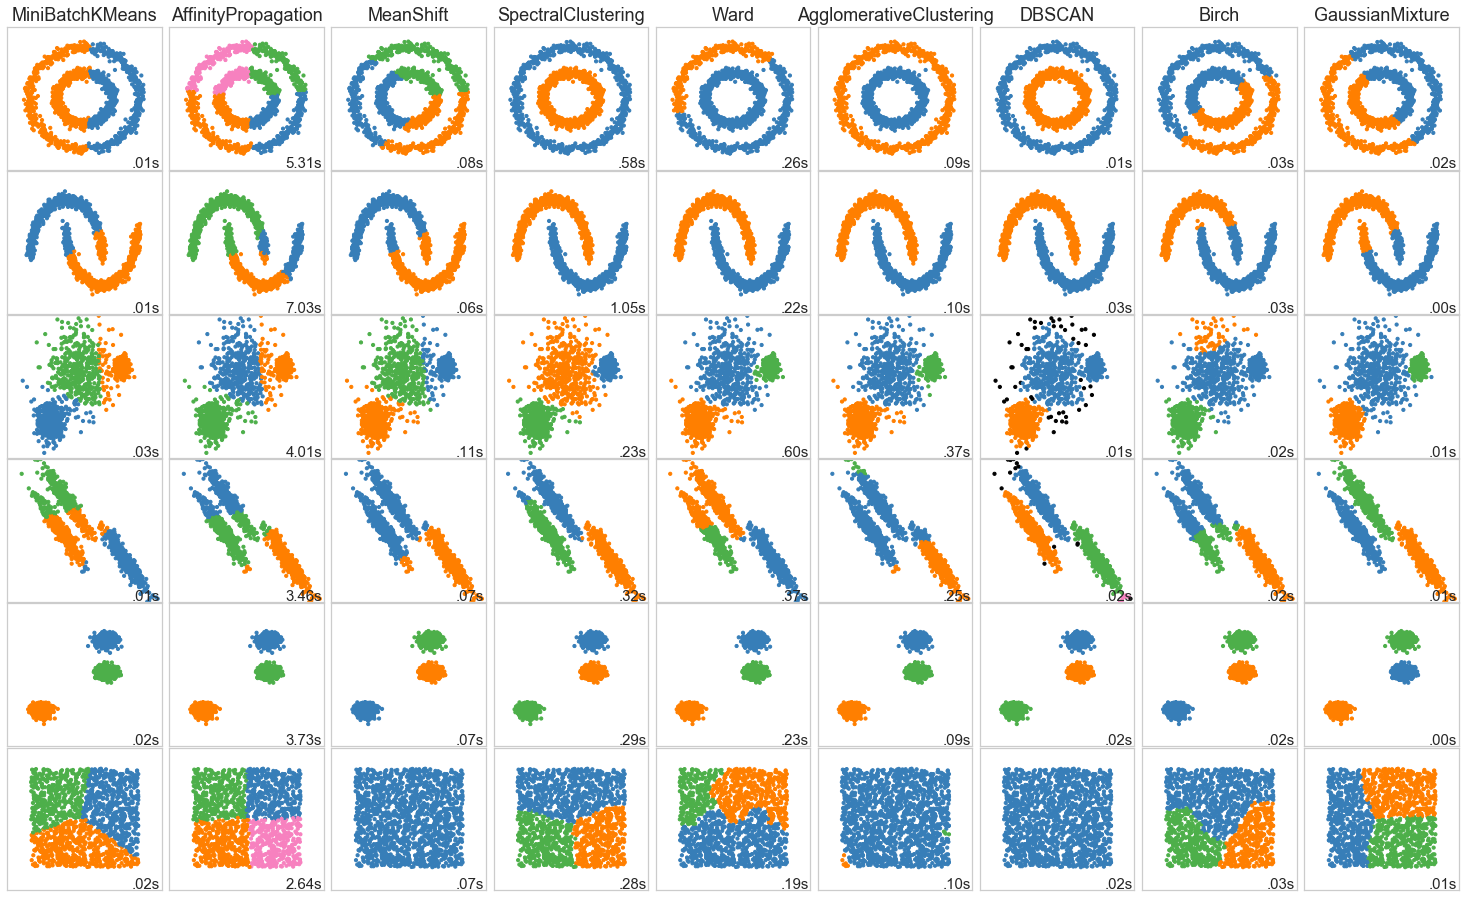

In [42]:
print(__doc__)

import time
import warnings

import numpy as np
import matplotlib.pyplot as plt


from sklearn import cluster, datasets, mixture
from sklearn.neighbors import kneighbors_graph
from sklearn.preprocessing import StandardScaler
from itertools import cycle, islice

np.random.seed(0)

# ============
# Generate datasets. We choose the size big enough to see the scalability
# of the algorithms, but not too big to avoid too long running times
# ============
n_samples = 1500
noisy_circles = datasets.make_circles(n_samples=n_samples, factor=.5,
                                      noise=.05)
noisy_moons = datasets.make_moons(n_samples=n_samples, noise=.05)
blobs = datasets.make_blobs(n_samples=n_samples, random_state=8)
no_structure = np.random.rand(n_samples, 2), None

# Anisotropicly distributed data
random_state = 170
X, y = datasets.make_blobs(n_samples=n_samples, random_state=random_state)
transformation = [[0.6, -0.6], [-0.4, 0.8]]
X_aniso = np.dot(X, transformation)
aniso = (X_aniso, y)

# blobs with varied variances
varied = datasets.make_blobs(n_samples=n_samples,
                             cluster_std=[1.0, 2.5, 0.5],
                             random_state=random_state)

# ============
# Set up cluster parameters
# ============
plt.figure(figsize=(9 * 2 + 3, 12.5))
plt.subplots_adjust(left=.02, right=.98, bottom=.001, top=.96, wspace=.05,
                    hspace=.01)

plot_num = 1

default_base = {'quantile': .3,
                'eps': .3,
                'damping': .9,
                'preference': -200,
                'n_neighbors': 10,
                'n_clusters': 3,
                'min_samples': 20,
                'xi': 0.05,
                'min_cluster_size': 0.1}

datasets = [
    (noisy_circles, {'damping': .77, 'preference': -240,
                     'quantile': .2, 'n_clusters': 2,
                     'min_samples': 20, 'xi': 0.25}),
    (noisy_moons, {'damping': .75, 'preference': -220, 'n_clusters': 2}),
    (varied, {'eps': .18, 'n_neighbors': 2,
              'min_samples': 5, 'xi': 0.035, 'min_cluster_size': .2}),
    (aniso, {'eps': .15, 'n_neighbors': 2,
             'min_samples': 20, 'xi': 0.1, 'min_cluster_size': .2}),
    (blobs, {}),
    (no_structure, {})]

for i_dataset, (dataset, algo_params) in enumerate(datasets):
    # update parameters with dataset-specific values
    params = default_base.copy()
    params.update(algo_params)

    X, y = dataset

    # normalize dataset for easier parameter selection
    X = StandardScaler().fit_transform(X)

    # estimate bandwidth for mean shift
    bandwidth = cluster.estimate_bandwidth(X, quantile=params['quantile'])

    # connectivity matrix for structured Ward
    connectivity = kneighbors_graph(
        X, n_neighbors=params['n_neighbors'], include_self=False)
    # make connectivity symmetric
    connectivity = 0.5 * (connectivity + connectivity.T)

    # ============
    # Create cluster objects
    # ============
    ms = cluster.MeanShift(bandwidth=bandwidth, bin_seeding=True)
    two_means = cluster.MiniBatchKMeans(n_clusters=params['n_clusters'])
    ward = cluster.AgglomerativeClustering(
        n_clusters=params['n_clusters'], linkage='ward',
        connectivity=connectivity)
    spectral = cluster.SpectralClustering(
        n_clusters=params['n_clusters'], eigen_solver='arpack',
        affinity="nearest_neighbors")
    dbscan = cluster.DBSCAN(eps=params['eps'])
    #optics = cluster.OPTICS(min_samples=params['min_samples'],
    #                        xi=params['xi'],
    #                        min_cluster_size=params['min_cluster_size'])
    affinity_propagation = cluster.AffinityPropagation(
        damping=params['damping'], preference=params['preference'])
    average_linkage = cluster.AgglomerativeClustering(
        linkage="average", affinity="cityblock",
        n_clusters=params['n_clusters'], connectivity=connectivity)
    birch = cluster.Birch(n_clusters=params['n_clusters'])
    gmm = mixture.GaussianMixture(
        n_components=params['n_clusters'], covariance_type='full')

    clustering_algorithms = (
        ('MiniBatchKMeans', two_means),
        ('AffinityPropagation', affinity_propagation),
        ('MeanShift', ms),
        ('SpectralClustering', spectral),
        ('Ward', ward),
        ('AgglomerativeClustering', average_linkage),
        ('DBSCAN', dbscan),
        #('OPTICS', optics),
        ('Birch', birch),
        ('GaussianMixture', gmm)
    )

    for name, algorithm in clustering_algorithms:
        t0 = time.time()

        # catch warnings related to kneighbors_graph
        with warnings.catch_warnings():
            warnings.filterwarnings(
                "ignore",
                message="the number of connected components of the " +
                "connectivity matrix is [0-9]{1,2}" +
                " > 1. Completing it to avoid stopping the tree early.",
                category=UserWarning)
            warnings.filterwarnings(
                "ignore",
                message="Graph is not fully connected, spectral embedding" +
                " may not work as expected.",
                category=UserWarning)
            algorithm.fit(X)

        t1 = time.time()
        if hasattr(algorithm, 'labels_'):
            y_pred = algorithm.labels_.astype(np.int)
        else:
            y_pred = algorithm.predict(X)

        plt.subplot(len(datasets), len(clustering_algorithms), plot_num)
        if i_dataset == 0:
            plt.title(name, size=18)

        colors = np.array(list(islice(cycle(['#377eb8', '#ff7f00', '#4daf4a',
                                             '#f781bf', '#a65628', '#984ea3',
                                             '#999999', '#e41a1c', '#dede00']),
                                      int(max(y_pred) + 1))))
        # add black color for outliers (if any)
        colors = np.append(colors, ["#000000"])
        plt.scatter(X[:, 0], X[:, 1], s=10, color=colors[y_pred])

        plt.xlim(-2.5, 2.5)
        plt.ylim(-2.5, 2.5)
        plt.xticks(())
        plt.yticks(())
        plt.text(.99, .01, ('%.2fs' % (t1 - t0)).lstrip('0'),
                 transform=plt.gca().transAxes, size=15,
                 horizontalalignment='right')
        plot_num += 1

plt.show()

<a id="1"></a>
## 1. What does KMeans do?

K-means clustering is a type of unsupervised learning, which is used when you have unlabeled data (i.e., data without defined categories or groups). The goal of this algorithm is to find groups in the data, with the number of groups represented by the variable K. The algorithm works iteratively to assign each data point to one of K groups based on the features that are provided. Data points are clustered based on feature similarity. The results of the K-means clustering algorithm are:

* The centroids of the K clusters, which can be used to label new data
* Labels for the training data (each data point is assigned to a single cluster)

![](https://imgur.com/a/wVDJPuZ)

![](https://i.imgur.com/rwkQNbv.png)

<a id="2"></a>
## 2. Applications
The K-means clustering algorithm is used to find groups which have not been explicitly labeled in the data. This can be used to confirm business assumptions about what types of groups exist or to identify unknown groups in complex data sets. Once the algorithm has been run and the groups are defined, any new data can be easily assigned to the correct group.

This is a versatile algorithm that can be used for any type of grouping. Some examples of use cases are:

* Behavioral segmentation:
* * Segment by purchase history
* * Segment by activities on application, website, or platform
* * Define personas based on interests
* * Create profiles based on activity monitoring
* Inventory categorization:
* * Group inventory by sales activity
* * Group inventory by manufacturing metrics
* Sorting sensor measurements:
* * Detect activity types in motion sensors
* * Group images
* * Separate audio
* * Identify groups in health monitoring
* Detecting bots or anomalies:
* * Separate valid activity groups from bots

<a id="3"></a>
## 3. Working

Let's now discuss the working of KMeans algorithm. The aim is to break the explanation down in the simplest way possible. 


#### It begins with choosing the number of K clusters. The K signifies the number of clusters that the algorithm would find in the dataset. Now choosing the right K is very important. Sometimes the K is clearly visible from the dataset when visualized. However most of the times this is not the case and in a short time we'll see about how to choose the right K value.



![](https://i.imgur.com/RBK4dtA.png)


#### The second step is to allocate K random points as centroids. These K points could be points from the dataset or outside. There's one thing to note however. The random initialisation of centroids can sometimes cause random initialisation trap which we would see in this section soon.

![](https://i.imgur.com/LfI2qfl.png)

#### In the third step the dataset points would be allocated to the centroid which is closest to them.



![](https://i.imgur.com/9I5JH3m.png)


#### The fourth step is to calculate the centroid of the individual clusters and place the old centroid there.




![](https://i.imgur.com/FyIeKuA.png)

#### The fifth step is to reassign points like we did in step 3. If reassignment takes place then we need to go back to step four. If no reassignment takes place then we can say that our model has converged and its ready.




![](https://i.imgur.com/aRaGcKB.png)

## Step Summary
### To summarise the steps we can say :
![](https://i.imgur.com/3jTk7Y0.png)

<a id="4"></a>
## 4. Choosing the right K

The way to evaluate the choice of K is made using a parameter known as WCSS. WCSS stands for **Within Cluster Sum of Squares**.
It should be low. Here's the formula representation for example when K = 3

Summation Distance(p,c) is the sum of distance of points in a cluster from the centroid.


![](https://i.imgur.com/5W63xul.png)

The Elbow Method is then used to choose the best K value. In the depiction below we can see that after 3 there's no significant decrease in WCSS so 3 is the best here. Therefore there's an elbow shape that forms and it is usually a good idea to pick the number where this elbow is formed. There would be many times when the graph wouldn't be this intuitive but with practice it becomes easier.

![](https://i.imgur.com/gi9p7V5.png)

<a id="5"></a>
## 5. Centroid Random Initialisation Trap

Through these images let's see how two different random initialisations can cause a totally different outcome.

### Init 1



![](https://i.imgur.com/zsC9z0z.png)




### Init 2



![](https://i.imgur.com/kU5BX6j.png)

So we saw that even with clear distinction possible visually, wrong randomisation can produce wrong results.
There have been researches carried out and one of the most famous ways to initialise centroids is KMeans++.
The best thing is that the whole algorithm remains the same but the only difference is that we provide an argument to SKlearn to use KMeans++ for initialisation. There are many papers explaining the KMeans++ but the explanation is beyond this notebook for now. :)

![](https://cdn-images-1.medium.com/max/1200/1*x7P7gqjo8k2_bj2rTQWAfg.jpeg)

<a id="6"></a>
## 6. Implementation

In [6]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(context="notebook", palette="Spectral", style = 'darkgrid' ,font_scale = 1.5, color_codes=True)
print(os.listdir("./data"))

['base_agrupamento_1.csv', 'base_agrupamento_2.csv', 'base_knn.csv', 'base_regressao_1.csv', 'base_regressao_2.csv', 'base_regressao_logistica.csv', 'base_svm.csv', 'boston.csv', 'breast.csv', 'cars.csv', 'desafio_fraude.csv', 'horse-colic.data', 'iris.csv', 'lenses_final.csv', 'Mall_Customers.csv', 'weights.csv']


In [7]:
# Importing the dataset
dataset = pd.read_csv('./data/Mall_Customers.csv',index_col='CustomerID')

In [8]:
dataset.head()

,Genre,Age,Annual_Income_(k$),Spending_Score
CustomerID,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40


In [9]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 1 to 200
Data columns (total 4 columns):
Genre                 200 non-null object
Age                   200 non-null int64
Annual_Income_(k$)    200 non-null int64
Spending_Score        200 non-null int64
dtypes: int64(3), object(1)
memory usage: 7.8+ KB


In [10]:
dataset.describe()

,Age,Annual_Income_(k$),Spending_Score
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


In [11]:
dataset.isnull().sum()

Genre                 0
Age                   0
Annual_Income_(k$)    0
Spending_Score        0
dtype: int64

No Nans found! Great

In [12]:
dataset.drop_duplicates(inplace=True)

In [13]:
# using only Spending_Score and income variable for easy visualisation
X = dataset.iloc[:, [2, 3]].values

In [14]:
# Using the elbow method to find the optimal number of clusters
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    # inertia method returns wcss for that model
    wcss.append(kmeans.inertia_)

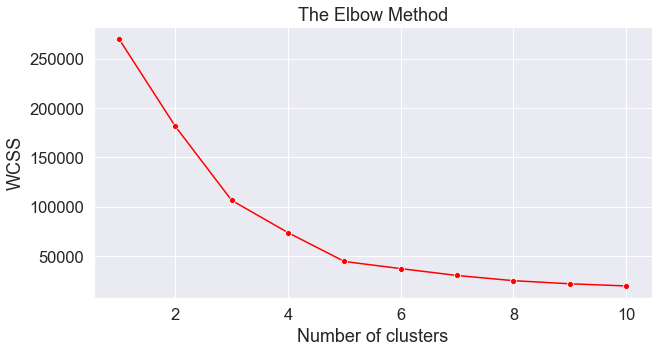

In [15]:
plt.figure(figsize=(10,5))
sns.lineplot(range(1, 11), wcss,marker='o',color='red')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


In [16]:
# Fitting K-Means to the dataset
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)

<a id="7"></a>
## 7. Visualisation

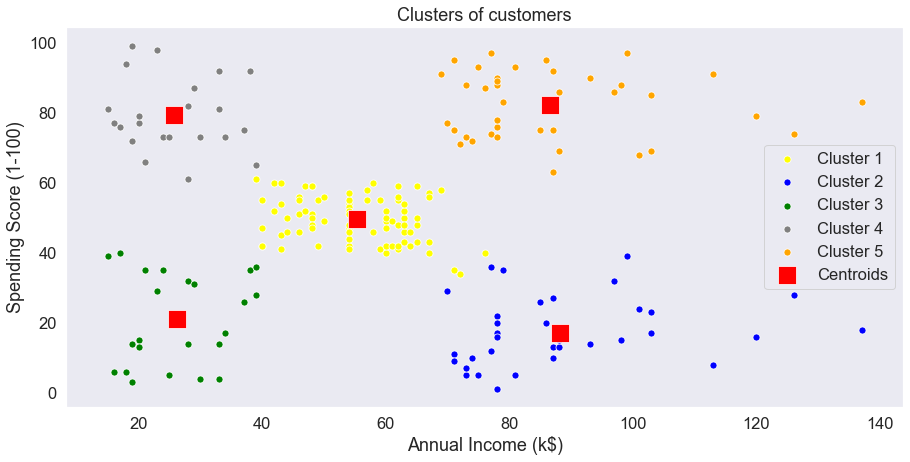

In [17]:
# Visualising the clusters
plt.figure(figsize=(15,7))
sns.scatterplot(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], color = 'yellow', label = 'Cluster 1',s=50)
sns.scatterplot(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], color = 'blue', label = 'Cluster 2',s=50)
sns.scatterplot(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], color = 'green', label = 'Cluster 3',s=50)
sns.scatterplot(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], color = 'grey', label = 'Cluster 4',s=50)
sns.scatterplot(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], color = 'orange', label = 'Cluster 5',s=50)
sns.scatterplot(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], color = 'red', 
                label = 'Centroids',s=300,marker=',')
plt.grid(False)
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

Big Thanks to:

* https://www.datascience.com/blog/k-means-clustering
* https://www.superdatascience.com
* https://www.udemy.com
